# - 교차로에서 사고가 났을 때 차종들간의 상관관계

In [9]:
import warnings

warnings.filterwarnings(action='ignore') 
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
intersection = pd.read_excel('C:\\Users\\masterT\\Desktop\\시흥시프로젝트\\교차로-차종.xlsx')
intersection

,car,ban,lorry,specialcar,two-wheeled vehicle,prime mover,bicycle,construction machinery,farm machinery,intersection
0,1588,177,329,10,91,28,13,19,0,1152
1,1480,171,304,14,71,23,22,15,1,1040
2,1474,187,357,9,83,33,22,15,0,1096
3,1307,170,286,12,59,31,17,15,0,990
4,1286,141,332,4,46,32,31,23,0,989
5,1549,172,364,6,59,53,35,21,1,1138
6,1452,161,302,10,66,50,36,38,0,983
7,1435,147,354,19,81,27,42,30,0,1017
8,1569,159,392,22,133,21,47,39,1,1192
9,1451,126,378,25,154,50,57,23,1,1148


In [10]:
# X, Y 분할하기
Y = intersection['intersection']
X = intersection.drop(['intersection'], axis=1, inplace=False)

In [11]:
# 훈련용 데이터와 평가용 데이터 분할하기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=156)

In [12]:
# 선형회귀분석 : 모델 생성
lr = LinearRegression()

In [13]:
# 선형회귀분석 : 모델 훈련
lr.fit(X_train, Y_train)

LinearRegression()

In [14]:
# 선형회귀분석 : 평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_predict = lr.predict(X_test)

In [15]:
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R^2(Variance score) : {0:.3f}'.format(r2_score(Y_test, Y_predict)))

MSE : 6438.229, RMSE : 80.239
R^2(Variance score) : 0.318


In [16]:
print('Y 절편 값: ', lr.intercept_)
print('회귀 계수 값: ', np.round(lr.coef_, 1))

Y 절편 값:  295.77747060425145
회귀 계수 값:  [ 0.4  0.   0.1 -1.1  1.3  3.1 -2.   0.6 -0.2]


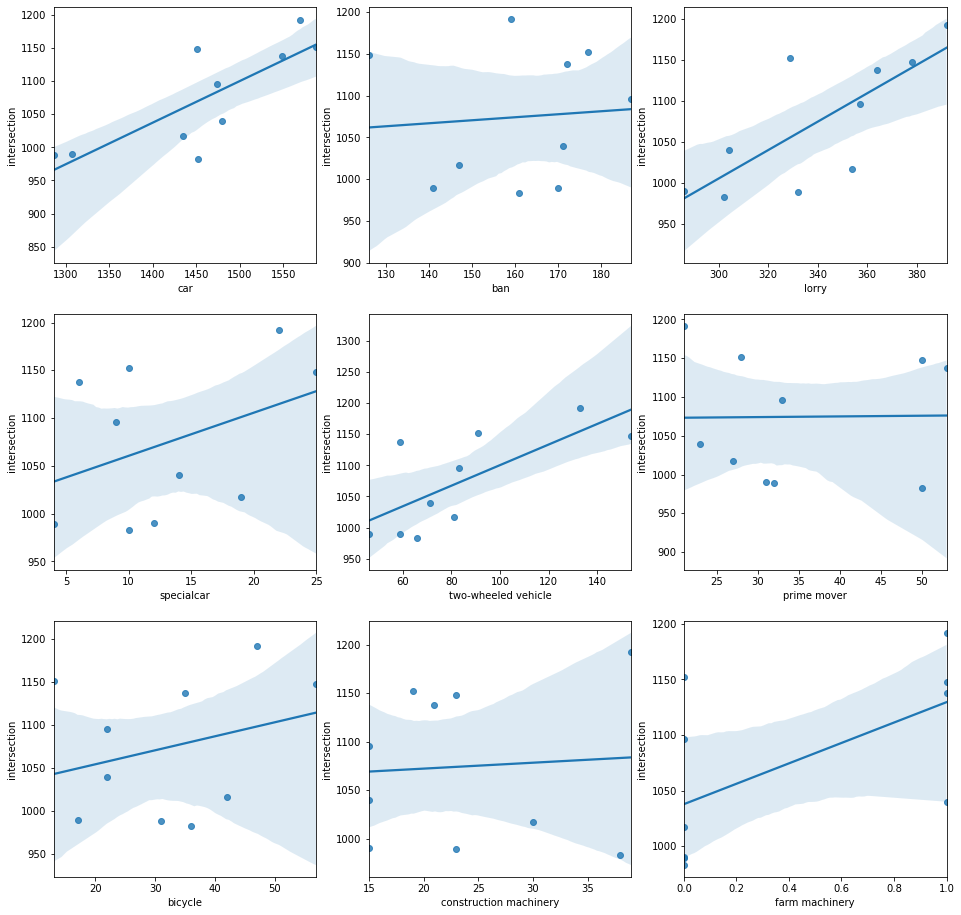

In [17]:
fig, axs = plt.subplots(figsize=(16, 16), ncols=3, nrows=3)

x_features = ['car', 'ban', 'lorry', 'specialcar', 'two-wheeled vehicle', 'prime mover', 'bicycle', 'construction machinery', 'farm machinery']


for i, feature in enumerate(x_features):
      row = int(i/3)
      col = i%3
      sns.regplot(x=feature, y='intersection', data=intersection, ax=axs[row][col])

In [18]:
import pandas as pd
from scipy import stats
from statsmodels.formula.api import ols, glm
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
intersection_corr = intersection.corr(method = 'pearson')
intersection_corr

,car,ban,lorry,specialcar,two-wheeled vehicle,prime mover,bicycle,construction machinery,farm machinery,intersection
car,1.000000,0.367666,0.478058,0.228166,0.443831,-0.001009,0.086282,0.209743,0.454351,0.794454
ban,0.367666,1.000000,-0.307169,-0.498891,-0.403240,-0.227984,-0.771628,-0.384522,-0.191406,0.083247
lorry,0.478058,-0.307169,1.000000,0.464666,0.674262,0.082314,0.681654,0.330272,0.483891,0.760916
specialcar,0.228166,-0.498891,0.464666,1.000000,0.861853,-0.159534,0.660520,0.353688,0.456125,0.390242
two-wheeled vehicle,0.443831,-0.403240,0.674262,0.861853,1.000000,-0.002308,0.632775,0.296058,0.501593,0.712179
prime mover,-0.001009,-0.227984,0.082314,-0.159534,-0.002308,1.000000,0.359997,0.085948,0.142090,0.013118
bicycle,0.086282,-0.771628,0.681654,0.660520,0.632775,0.359997,1.000000,0.631091,0.495218,0.285342
construction machinery,0.209743,-0.384522,0.330272,0.353688,0.296058,0.085948,0.631091,1.000000,0.066639,0.069169
farm machinery,0.454351,-0.191406,0.483891,0.456125,0.501593,0.142090,0.495218,0.066639,1.000000,0.594663
intersection,0.794454,0.083247,0.760916,0.390242,0.712179,0.013118,0.285342,0.069169,0.594663,1.000000


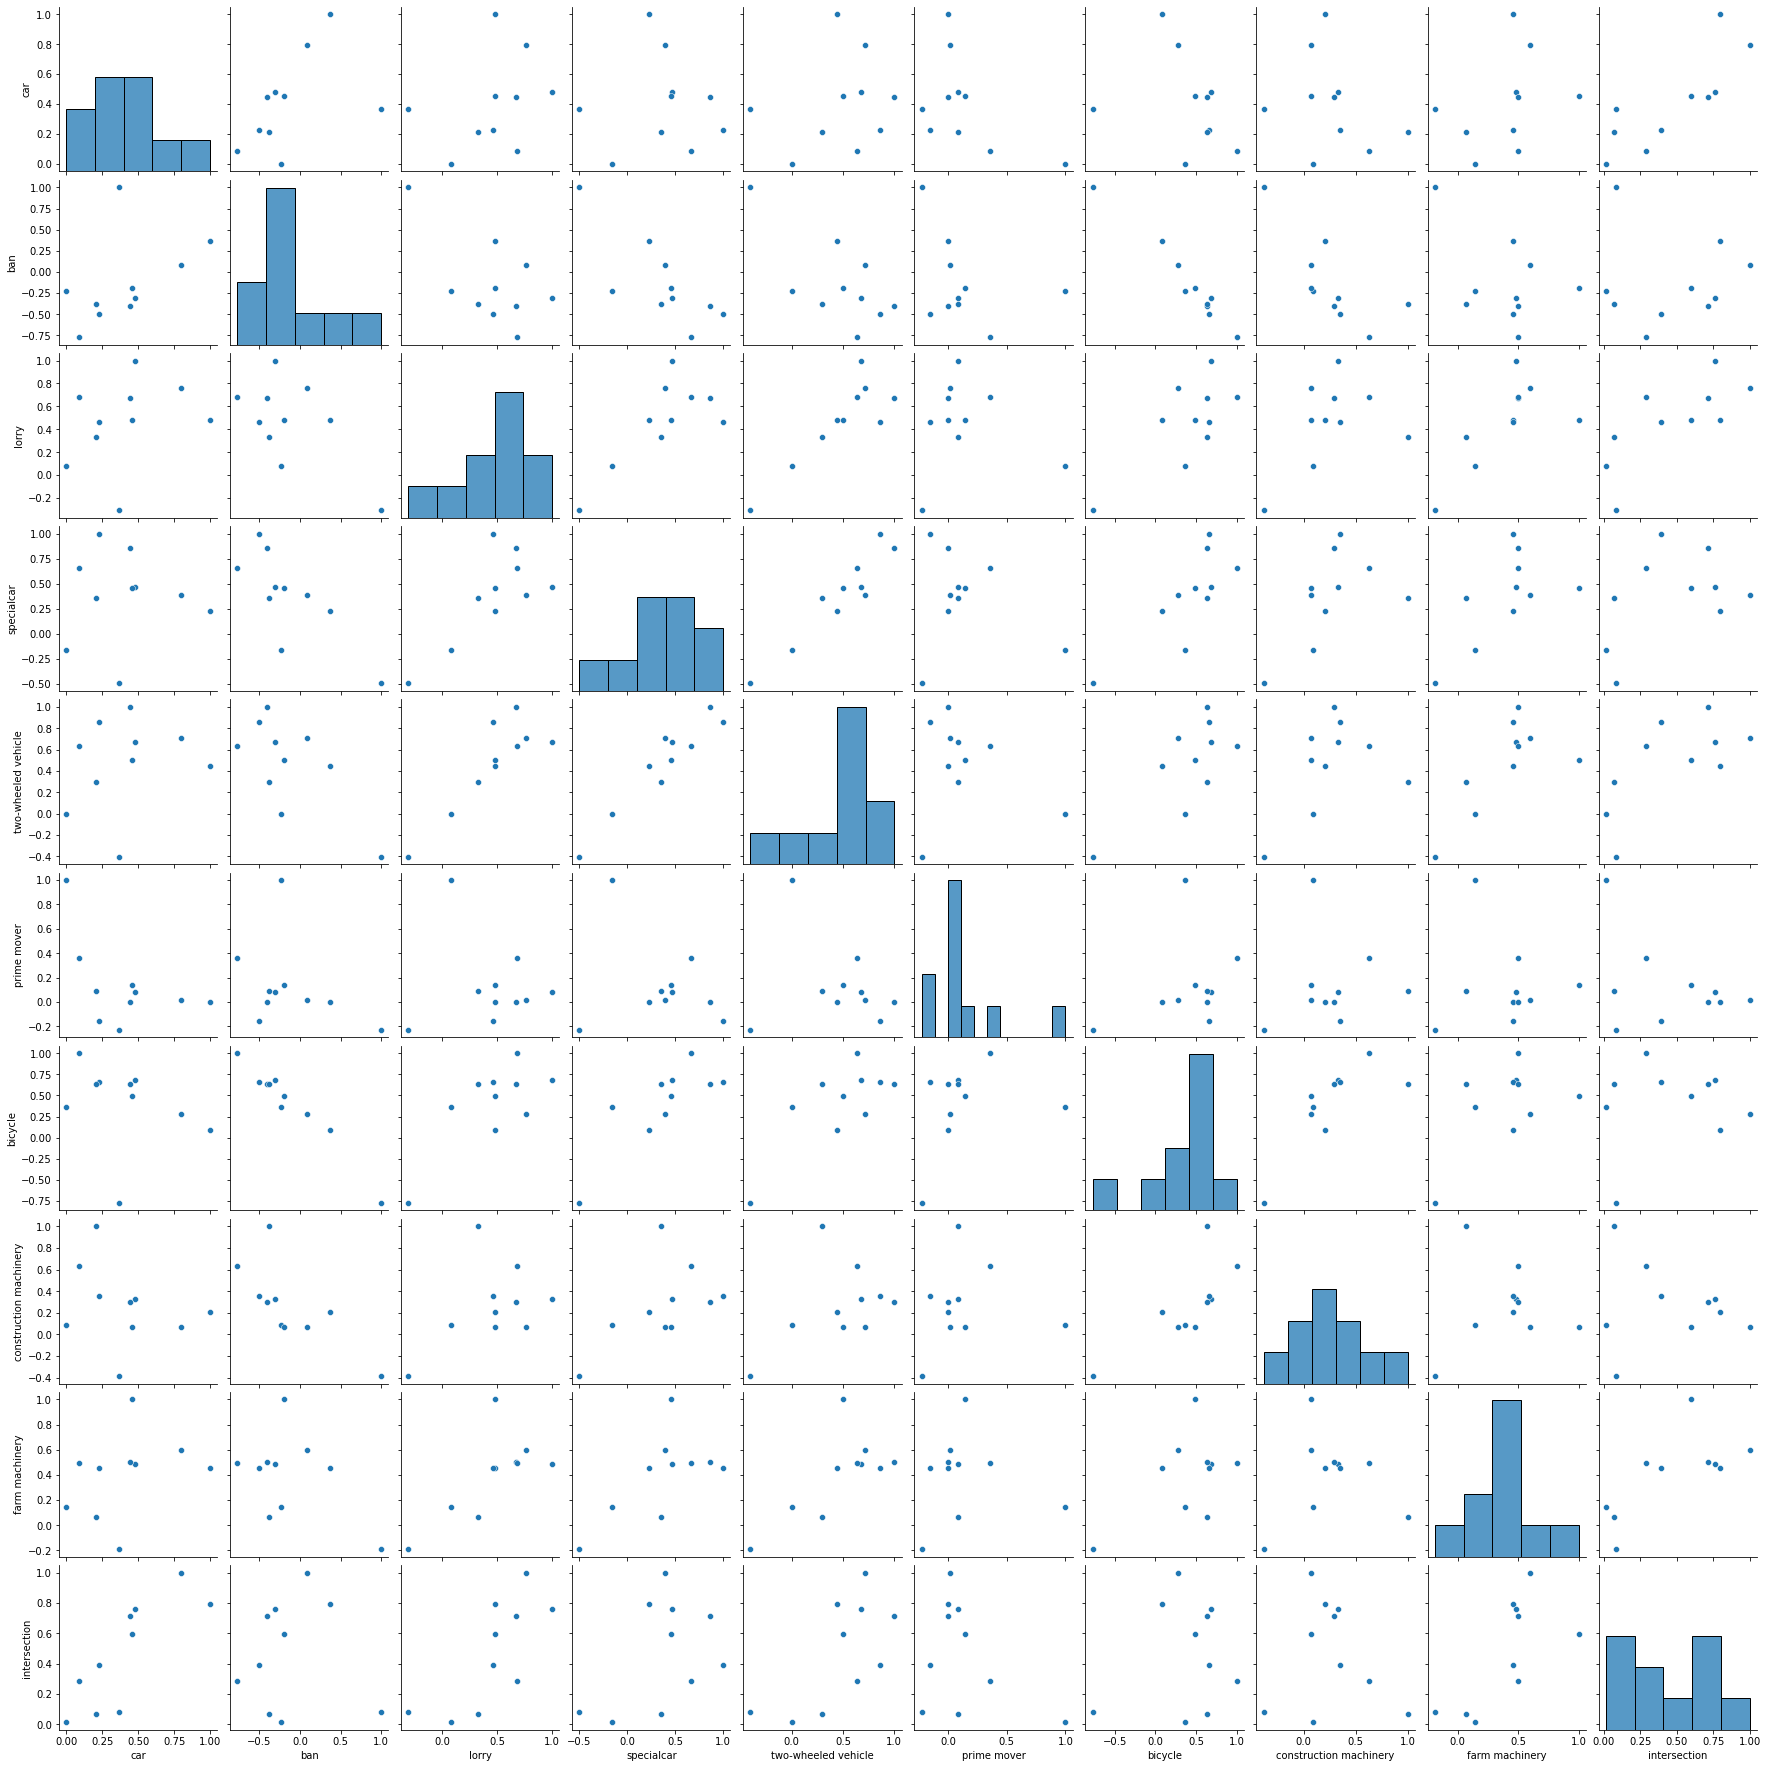

In [25]:
sns.pairplot(intersection_corr)

In [23]:
heatmap_data = intersection_corr[['car', 'ban', 'lorry', 'specialcar', 'two-wheeled vehicle', 'prime mover', 'bicycle', 'construction machinery', 'farm machinery', 'intersection']]
colormap = plt.cm.RdBu

<AxesSubplot:>

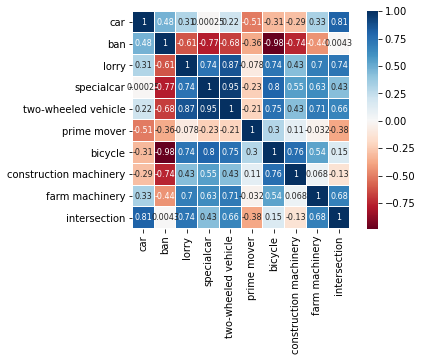

In [24]:
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={'size':8})